# Import Libraries

In [6]:
import pandas as pd
# Load survey data (intentionally messy!)
df_survey = pd.read_csv('../datasets/survey_results.csv', parse_dates=['submission_date'])

In [11]:
# show missing value count per column, name the result column 'missing_values_counts'
missing_values = df_survey.isnull().sum()
missing_values = missing_values.rename('missing_values_counts')
missing_values

response_id             0
submission_date         0
age_group              32
gender                 14
satisfaction_score     34
product_quality        27
customer_service       23
would_recommend        29
annual_income          43
region                  0
comments              155
Name: missing_values_counts, dtype: int64

In [13]:
# show missing values percentage per column, name the result column 'missing_values_percentage'
missing_values_percentage = (df_survey.isnull().mean() * 100).round(2)
missing_values_percentage = missing_values_percentage.rename('missing_values_percentage')

# sort by missing_values_percentage in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage

comments              31.0
annual_income          8.6
satisfaction_score     6.8
age_group              6.4
would_recommend        5.8
product_quality        5.4
customer_service       4.6
gender                 2.8
response_id            0.0
submission_date        0.0
region                 0.0
Name: missing_values_percentage, dtype: float64

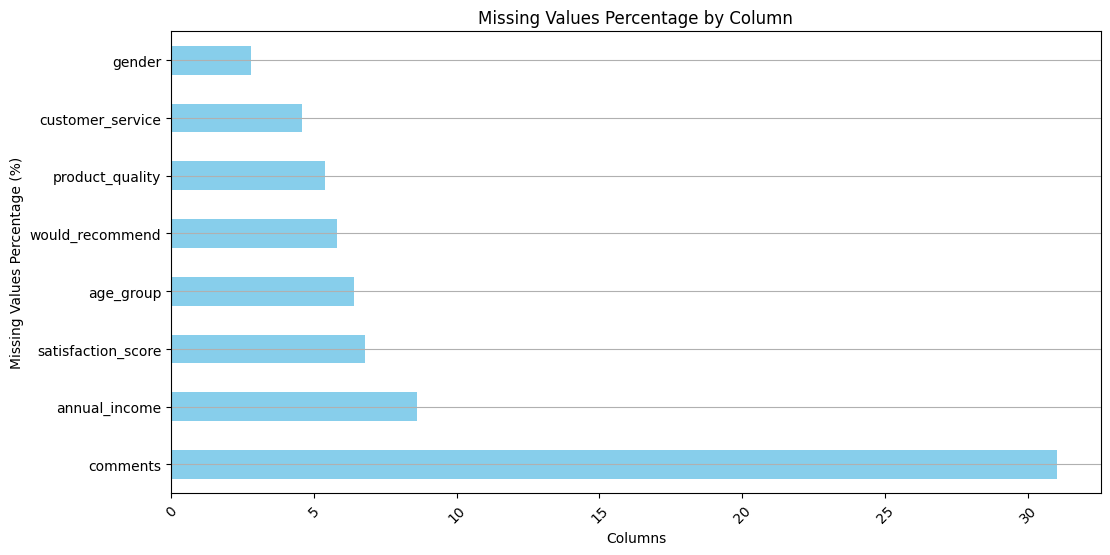

In [16]:
# create a bar chart of missing values percentage
import matplotlib.pyplot as plt

# show only non-zero missing values percentages
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]
plt.figure(figsize=(12, 6))

# show in horizontal bar chart
missing_values_percentage.plot(kind='barh', color='skyblue')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Fill in missing values

In [20]:
# fill in missing values for comment column with 'No Comment Provided'
df_survey['comments'] = df_survey['comments'].fillna('No Comment Provided')
df_survey['comments'].value_counts()

comments
No Comment Provided     155
Could be better          58
Great service!           56
Very satisfied           55
Not what I expected      54
Excellent experience     49
Average                  39
Had some issues          34
Name: count, dtype: int64

In [28]:
# fill missing values in satisfaction score column with the mean satisfaction score
mean_satisfaction = df_survey['satisfaction_score'].mean()
df_survey['satisfaction_score'] = df_survey['satisfaction_score'].fillna(mean_satisfaction)

In [29]:
df_survey['satisfaction_score'].isnull().sum()  # should be 0 now

np.int64(0)

<Axes: >

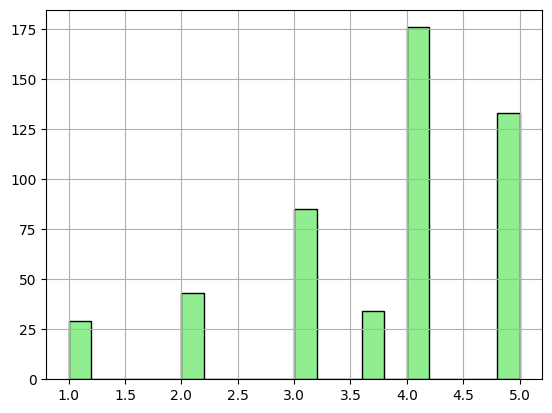

In [30]:
df_survey['satisfaction_score'].hist(bins=20, color='lightgreen', edgecolor='black')

In [31]:
df_survey

,response_id,submission_date,age_group,gender,satisfaction_score,product_quality,customer_service,would_recommend,annual_income,region,comments
0,RESP00250,2024-01-01,56-65,Male,3.0,Excellent,Excellent,Yes,$50k-$75k,West,No Comment Provided
1,RESP00102,2024-01-01,36-45,Male,4.0,Good,Excellent,Yes,$75k-$100k,South,Very satisfied
2,RESP00351,2024-01-01,36-45,Female,5.0,Very Good,Fair,Yes,$25k-$50k,South,No Comment Provided
3,RESP00222,2024-01-01,18-25,Female,4.0,Very Good,Very Good,Yes,$50k-$75k,West,Very satisfied
4,RESP00124,2024-01-01,46-55,Male,5.0,Very Good,Excellent,No,NaN,East,No Comment Provided
...,...,...,...,...,...,...,...,...,...,...,...
495,RESP00307,2024-03-31,26-35,Male,5.0,Good,Fair,NaN,$25k-$50k,South,Excellent experience
496,RESP00068,2024-03-31,18-25,NaN,5.0,Excellent,Very Good,NaN,$50k-$75k,East,Could be better
497,RESP00074,2024-03-31,46-55,Male,5.0,NaN,Excellent,No,$50k-$75k,North,Not what I expected
498,RESP00219,2024-03-31,36-45,Male,4.0,Excellent,Good,Yes,$75k-$100k,Central,Not what I expected


In [34]:
# ffill age group missing values
df_ffill = df_survey.copy()
df_ffill['age_group'] = df_ffill['age_group'].fillna(method='ffill')
df_ffill

C:\Users\Acer\AppData\Local\Temp\ipykernel_29204\2567652508.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['age_group'] = df_ffill['age_group'].fillna(method='ffill')


,response_id,submission_date,age_group,gender,satisfaction_score,product_quality,customer_service,would_recommend,annual_income,region,comments
0,RESP00250,2024-01-01,56-65,Male,3.0,Excellent,Excellent,Yes,$50k-$75k,West,No Comment Provided
1,RESP00102,2024-01-01,36-45,Male,4.0,Good,Excellent,Yes,$75k-$100k,South,Very satisfied
2,RESP00351,2024-01-01,36-45,Female,5.0,Very Good,Fair,Yes,$25k-$50k,South,No Comment Provided
3,RESP00222,2024-01-01,18-25,Female,4.0,Very Good,Very Good,Yes,$50k-$75k,West,Very satisfied
4,RESP00124,2024-01-01,46-55,Male,5.0,Very Good,Excellent,No,NaN,East,No Comment Provided
...,...,...,...,...,...,...,...,...,...,...,...
495,RESP00307,2024-03-31,26-35,Male,5.0,Good,Fair,NaN,$25k-$50k,South,Excellent experience
496,RESP00068,2024-03-31,18-25,NaN,5.0,Excellent,Very Good,NaN,$50k-$75k,East,Could be better
497,RESP00074,2024-03-31,46-55,Male,5.0,NaN,Excellent,No,$50k-$75k,North,Not what I expected
498,RESP00219,2024-03-31,36-45,Male,4.0,Excellent,Good,Yes,$75k-$100k,Central,Not what I expected


In [38]:
df_survey = pd.read_csv('../datasets/survey_results.csv', parse_dates=['submission_date'])
df_survey

,response_id,submission_date,age_group,gender,satisfaction_score,product_quality,customer_service,would_recommend,annual_income,region,comments
0,RESP00250,2024-01-01,56-65,Male,3.0,Excellent,Excellent,Yes,$50k-$75k,West,NaN
1,RESP00102,2024-01-01,36-45,Male,4.0,Good,Excellent,Yes,$75k-$100k,South,Very satisfied
2,RESP00351,2024-01-01,36-45,Female,5.0,Very Good,Fair,Yes,$25k-$50k,South,NaN
3,RESP00222,2024-01-01,18-25,Female,4.0,Very Good,Very Good,Yes,$50k-$75k,West,Very satisfied
4,RESP00124,2024-01-01,46-55,Male,5.0,Very Good,Excellent,No,NaN,East,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,RESP00307,2024-03-31,26-35,Male,5.0,Good,Fair,NaN,$25k-$50k,South,Excellent experience
496,RESP00068,2024-03-31,18-25,NaN,5.0,Excellent,Very Good,NaN,$50k-$75k,East,Could be better
497,RESP00074,2024-03-31,46-55,Male,5.0,NaN,Excellent,No,$50k-$75k,North,Not what I expected
498,RESP00219,2024-03-31,36-45,Male,4.0,Excellent,Good,Yes,$75k-$100k,Central,Not what I expected


In [ ]:
df_survey = pd.read_csv('../datasets/survey_results.csv', parse_dates=['submission_date'])
# conditionally impute satisfaction score based on region for df_survey
df_conditional = df_survey.copy()
df_conditional['satisfaction_score'] = df_conditional.groupby('region')['satisfaction_score'].transform(lambda x: x.fillna(x.mean()))
df_conditional

,response_id,submission_date,age_group,gender,satisfaction_score,product_quality,customer_service,would_recommend,annual_income,region,comments
0,RESP00250,2024-01-01,56-65,Male,3.0,Excellent,Excellent,Yes,$50k-$75k,West,NaN
1,RESP00102,2024-01-01,36-45,Male,4.0,Good,Excellent,Yes,$75k-$100k,South,Very satisfied
2,RESP00351,2024-01-01,36-45,Female,5.0,Very Good,Fair,Yes,$25k-$50k,South,NaN
3,RESP00222,2024-01-01,18-25,Female,4.0,Very Good,Very Good,Yes,$50k-$75k,West,Very satisfied
4,RESP00124,2024-01-01,46-55,Male,5.0,Very Good,Excellent,No,NaN,East,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,RESP00307,2024-03-31,26-35,Male,5.0,Good,Fair,NaN,$25k-$50k,South,Excellent experience
496,RESP00068,2024-03-31,18-25,NaN,5.0,Excellent,Very Good,NaN,$50k-$75k,East,Could be better
497,RESP00074,2024-03-31,46-55,Male,5.0,NaN,Excellent,No,$50k-$75k,North,Not what I expected
498,RESP00219,2024-03-31,36-45,Male,4.0,Excellent,Good,Yes,$75k-$100k,Central,Not what I expected
